#### –ò–º–æ—Ä–∏—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã!")

–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã!


#### –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: (260640, 10)
–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:
   index    Date     Time  Global_active_power  Global_reactive_power  \
0      0  1/1/07  0:00:00                2.580                  0.136   
1      1  1/1/07  0:01:00                2.552                  0.100   
2      2  1/1/07  0:02:00                2.550                  0.100   
3      3  1/1/07  0:03:00                2.550                  0.100   
4      4  1/1/07  0:04:00                2.554                  0.100   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0   241.97              10.6             0.0             0.0             0.0  
1   241.75              10.4             0.0             0.0             0.0  
2   241.64              10.4             0.0             0.0             0.0  
3   241.71              10.4             0.0             0.0             0.0  
4   241.98              10.4             0.0             0.0             0.0  

–í –Ω–∞–±–æ—Ä–µ '–ü

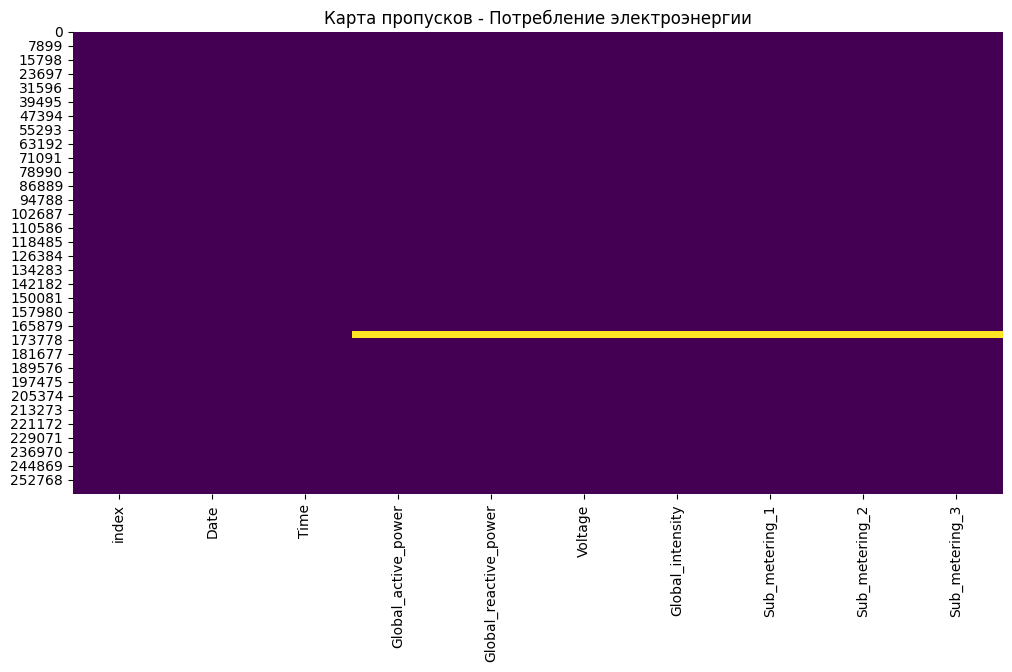

In [2]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –ø—Ä–æ–ø—É—Å–∫–æ–≤
df = pd.read_csv('df/isxod.csv', 
                 na_values=['?'],  # –ø–æ–º–µ—á–∞–µ–º '?' –∫–∞–∫ –ø—Ä–æ–ø—É—Å–∫–∏
                 low_memory=False)

print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: {df.shape}")
print(f"–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
print(f"{df.head()}\n")

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤
def analyze_missing_data(dataframe, name):
    missing_total = dataframe.isnull().sum().sum()
    missing_percent = (missing_total / (dataframe.shape[0] * dataframe.shape[1])) * 100
    print(f"–í –Ω–∞–±–æ—Ä–µ '{name}': {missing_total} –ø—Ä–æ–ø—É—Å–∫–æ–≤ ({missing_percent:.2f}%)")
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
    plt.figure(figsize=(12, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title(f"–ö–∞—Ä—Ç–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ - {name}")
    plt.show()

analyze_missing_data(df, "–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏")

#### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ 

In [3]:
# –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ 

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏
print(f"–ü—Ä–æ–ø—É—Å–∫–∏ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df.isnull().sum().sum()}\n")

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Ä–∞–∑–Ω—ã–º–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        # –î–ª—è —á–∏—Å–ª–æ–≤—ã—Ö - –º–µ–¥–∏–∞–Ω–æ–π (—É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º)
        df[column] = df[column].fillna(df[column].median())
        print(f"–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü '{column}' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π")

print(f"\n–ü—Ä–æ–ø—É—Å–∫–∏ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df.isnull().sum().sum()}")

–ü—Ä–æ–ø—É—Å–∫–∏ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: 26397

–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'index' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'Global_active_power' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'Global_reactive_power' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'Voltage' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'Global_intensity' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'Sub_metering_1' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'Sub_metering_2' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π
–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü 'Sub_metering_3' –∑–∞–ø–æ–ª–Ω–µ–Ω –º–µ–¥–∏–∞–Ω–æ–π

–ü—Ä–æ–ø—É—Å–∫–∏ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: 0


–í –Ω–∞–±–æ—Ä–µ '–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏': 0 –ø—Ä–æ–ø—É—Å–∫–æ–≤ (0.00%)


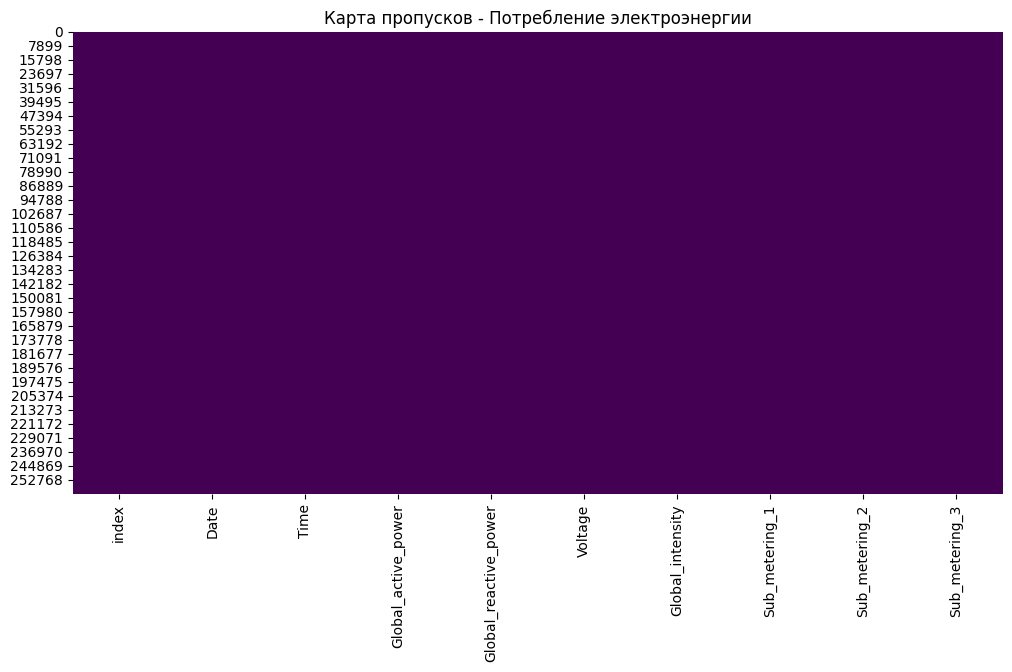

In [4]:
analyze_missing_data(df, "–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏")

In [5]:
# –°–æ–∑–¥–∞–µ–º datetime –∏–Ω–¥–µ–∫—Å
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('datetime')

# –£–¥–∞–ª—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–∞—Ç—ã –∏ –≤—Ä–µ–º–µ–Ω–∏
df = df.drop(['Date', 'Time'], axis=1)

# –£–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü 'index' - —Ç–µ–ø–µ—Ä—å datetime –∏–Ω–¥–µ–∫—Å
df = df.drop('index', axis=1)

print("–í—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω–¥–µ–∫—Å datetime —Å–æ–∑–¥–∞–Ω")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω –¥–∞–Ω–Ω—ã—Ö: –æ—Ç {df.index.min()} –¥–æ {df.index.max()}")

–í—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω–¥–µ–∫—Å datetime —Å–æ–∑–¥–∞–Ω
–î–∏–∞–ø–∞–∑–æ–Ω –¥–∞–Ω–Ω—ã—Ö: –æ—Ç 2007-01-01 00:00:00 –¥–æ 2007-12-06 23:59:00


In [6]:
# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤—Ä–µ–º–µ–Ω–∏ (–≤–∞–∂–Ω–æ –¥–ª—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏)

df['hour'] = df.index.hour # (0-23)
# –ü—Ä–∏–º–µ—Ä: 
# 0 = –ø–æ–ª–Ω–æ—á—å, 12 = –ø–æ–ª–¥–µ–Ω—å, 18 = 6 –≤–µ—á–µ—Ä–∞
# –ù—É–∂–µ–Ω —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –ø–æ–Ω–∏–º–∞–ª–∞ "–Ω–æ—á–Ω—ã–µ –ø—Ä–æ–≤–∞–ª—ã" –∏ "–¥–Ω–µ–≤–Ω—ã–µ –ø–∏–∫–∏"
# –ó–∞—á–µ–º: –≠–Ω–µ—Ä–≥–æ–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫


df['day_of_week'] = df.index.dayofweek # (0-6)
# 0 = –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, 1 = –≤—Ç–æ—Ä–Ω–∏–∫, ..., 6 = –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ
# –í –¥–∞–Ω–Ω—ã—Ö: [0 3 6 1 4 2 5] - —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –ø–æ—Ä—è–¥–æ–∫ –¥–Ω–µ–π
# –ó–∞—á–µ–º: –ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π


df['month'] = df.index.month # (1-12)
# 1 = —è–Ω–≤–∞—Ä—å, 12 = –¥–µ–∫–∞–±—Ä—å
# –ó–∏–º–æ–π - –æ—Ç–æ–ø–ª–µ–Ω–∏–µ, –ª–µ—Ç–æ–º - –∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–µ—Ä—ã
# –ó–∞—á–µ–º: –£—á–µ—Å—Ç—å —Å–µ–∑–æ–Ω–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è (–æ—Ç–æ–ø–ª–µ–Ω–∏–µ/–∫–æ–Ω–¥–∏—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ)


df['is_weekend'] = (df.index.dayofweek >= 5).astype(int) # (0 –∏–ª–∏ 1)
# 0 = —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å, 1 = —Å—É–±–±–æ—Ç–∞/–≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ
# –£–ø—Ä–æ—â–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è day_of_week
# –ó–∞—á–µ–º: –ë—ã—Å—Ç—Ä–æ –≤—ã–¥–µ–ª–∏—Ç—å –≤—ã—Ö–æ–¥–Ω—ã–µ –¥–Ω–∏


print("–í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–∑–¥–∞–Ω—ã:")
print(f"–ß–∞—Å—ã: {df['hour'].unique()}")
print(f"–î–Ω–∏ –Ω–µ–¥–µ–ª–∏: {df['day_of_week'].unique()}")

–í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–∑–¥–∞–Ω—ã:
–ß–∞—Å—ã: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
–î–Ω–∏ –Ω–µ–¥–µ–ª–∏: [0 3 6 1 4 2 5]


In [7]:
df.head(5)

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2007-01-01 00:00:00                2.580                  0.136   241.97   
2007-01-01 00:01:00                2.552                  0.100   241.75   
2007-01-01 00:02:00                2.550                  0.100   241.64   
2007-01-01 00:03:00                2.550                  0.100   241.71   
2007-01-01 00:04:00                2.554                  0.100   241.98   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2007-01-01 00:00:00              10.6             0.0             0.0   
2007-01-01 00:01:00              10.4             0.0             0.0   
2007-01-01 00:02:00              10.4             0.0             0.0   
2007-01-01 00:03:00              10.4             0.0             0.0   
2007-01-01 00:04:00              10.4             0.0             0.0   

                     Sub_metering_3  hour  day_of_week  month  is_weekend  
datetime                                                                   
2007-01-01 00:00:00             0.0     0            0      1           0  
2007-01-01 00:01:00             0.0     0            0      1           0  
2007-01-01 00:02:00             0.0     0            0      1           0  
2007-01-01 00:03:00             0.0     0            0      1           0  
2007-01-01 00:04:00             0.0     0            0      1           0

In [8]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
df.to_csv('df/obr.csv')
print("–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'df/obr.csv'")

# –¢–∞–∫–∂–µ —Å–æ—Ö—Ä–∞–Ω–∏–º sample –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
sample_df = df.sample(300)  # 300 —Å–ª—É—á–∞–π–Ω—ã—Ö —Å—Ç—Ä–æ–∫
sample_df.to_csv('df/obr_sample.csv')
print("Sample –¥–∞–Ω–Ω—ã—Ö —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤ 'df/obr_sample.csv'")

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–∑–º–µ—Ä —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print(f"\n–†–∞–∑–º–µ—Ä –ø–æ–ª–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}")
print(f"–†–∞–∑–º–µ—Ä sample: {sample_df.shape}")

–û–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'df/obr.csv'
Sample –¥–∞–Ω–Ω—ã—Ö —Å–æ—Ö—Ä–∞–Ω–µ–Ω –≤ 'df/obr_sample.csv'

–†–∞–∑–º–µ—Ä –ø–æ–ª–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: (260640, 11)
–†–∞–∑–º–µ—Ä sample: (300, 11)


#### –ê–Ω–∞–ª–∏–∑

üìä –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≤—Ä–µ–º–µ–Ω–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
–ß–∞—Å—ã: –æ—Ç 0 –¥–æ 23
–î–Ω–∏ –Ω–µ–¥–µ–ª–∏: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6)]
–ú–µ—Å—è—Ü—ã: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
–í—ã—Ö–æ–¥–Ω—ã–µ: is_weekend
0    187200
1     73440
Name: count, dtype: int64


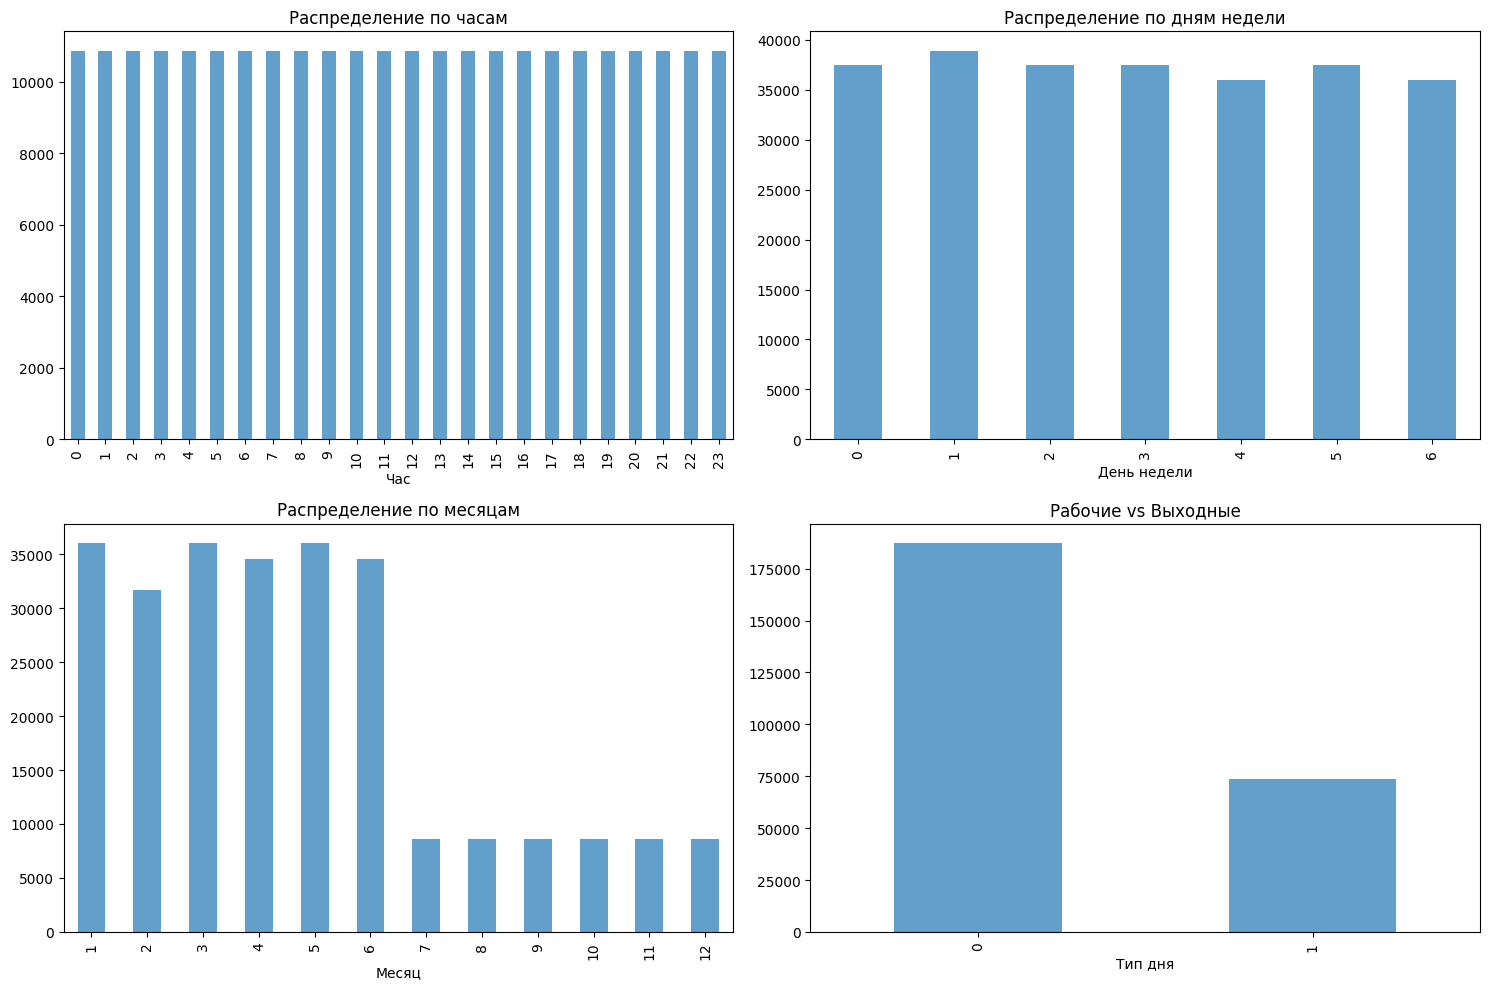

In [9]:
print("üìä –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≤—Ä–µ–º–µ–Ω–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º:")
print(f"–ß–∞—Å—ã: –æ—Ç {df['hour'].min()} –¥–æ {df['hour'].max()}")
print(f"–î–Ω–∏ –Ω–µ–¥–µ–ª–∏: {sorted(df['day_of_week'].unique())}")
print(f"–ú–µ—Å—è—Ü—ã: {sorted(df['month'].unique())}")
print(f"–í—ã—Ö–æ–¥–Ω—ã–µ: {df['is_weekend'].value_counts()}")

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['hour'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —á–∞—Å–∞–º')
plt.xlabel('–ß–∞—Å')

plt.subplot(2, 2, 2)
df['day_of_week'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏')
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')

plt.subplot(2, 2, 3)
df['month'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.xlabel('–ú–µ—Å—è—Ü')

plt.subplot(2, 2, 4)
df['is_weekend'].value_counts().plot(kind='bar', alpha=0.7)
plt.title('–†–∞–±–æ—á–∏–µ vs –í—ã—Ö–æ–¥–Ω—ã–µ')
plt.xlabel('–¢–∏–ø –¥–Ω—è')

plt.tight_layout()
plt.show()


–ê–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (Global_active_power):
–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 1.16 –∫–í—Ç
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 10.67 –∫–í—Ç
–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 0.08 –∫–í—Ç
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 260640


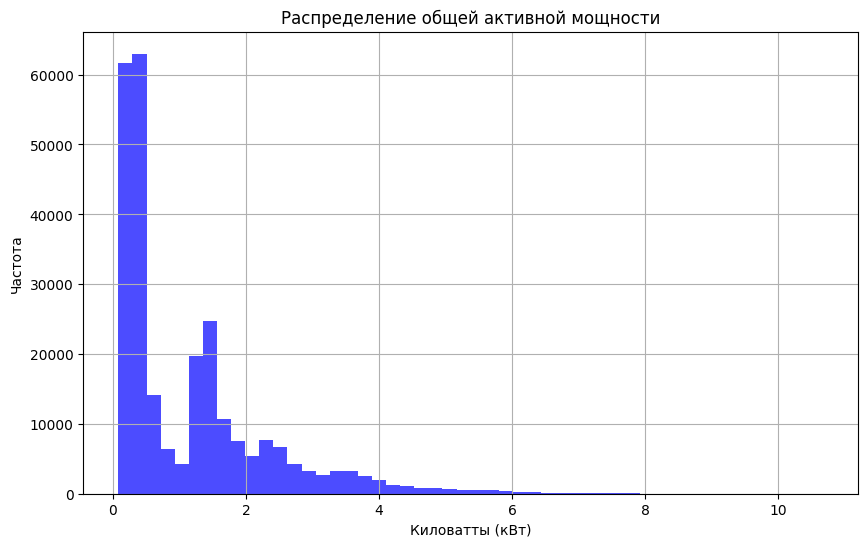

In [10]:
# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
print(f"\n–ê–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (Global_active_power):")
print(f"–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {df['Global_active_power'].mean():.2f} –∫–í—Ç")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {df['Global_active_power'].max():.2f} –∫–í—Ç") 
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {df['Global_active_power'].min():.2f} –∫–í—Ç")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(df)}")

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
plt.figure(figsize=(10, 6))
plt.hist(df['Global_active_power'].dropna(), bins=50, alpha=0.7, color='blue')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—â–µ–π –∞–∫—Ç–∏–≤–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç–∏')
plt.xlabel('–ö–∏–ª–æ–≤–∞—Ç—Ç—ã (–∫–í—Ç)')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.grid(True)
plt.show()

–ê–Ω–∞–ª–∏–∑ —Å—É—Ç–æ—á–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏:


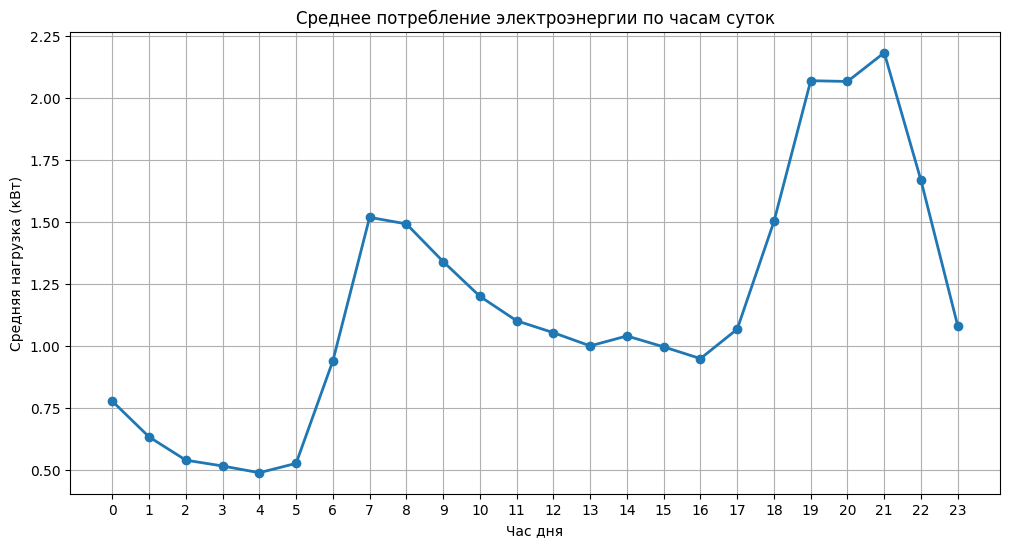

–ù–∞–±–ª—é–¥–µ–Ω–∏—è –ø–æ —Å—É—Ç–æ—á–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏:
–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 0.49 –∫–í—Ç –≤ 4:00
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: 2.18 –∫–í—Ç –≤ 21:00


In [11]:
# –ê–Ω–∞–ª–∏–∑ —Å—É—Ç–æ—á–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏
print("–ê–Ω–∞–ª–∏–∑ —Å—É—Ç–æ—á–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏:")

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ —á–∞—Å–∞–º –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω—é—é –Ω–∞–≥—Ä—É–∑–∫—É
hourly_pattern = df.groupby('hour')['Global_active_power'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o', linewidth=2)
plt.title('–°—Ä–µ–¥–Ω–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ —ç–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–∏–∏ –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –Ω–∞–≥—Ä—É–∑–∫–∞ (–∫–í—Ç)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

print("–ù–∞–±–ª—é–¥–µ–Ω–∏—è –ø–æ —Å—É—Ç–æ—á–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏:")
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {hourly_pattern.min():.2f} –∫–í—Ç –≤ {hourly_pattern.idxmin()}:00")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ: {hourly_pattern.max():.2f} –∫–í—Ç –≤ {hourly_pattern.idxmax()}:00")